In [1]:
# /content/complaints.csv

In [2]:
# Data  --- raw /processfile/multiple /sources data

# models --> different models are stored here( model1 , model2, 3)
# experiment tracking :- commenting for the code

# notebooks--->

# output --->

# reports --->

# src/core/app :-
# backend code/ api/ forntend


In [3]:
# step 1 :-
# Understand problem (in a bussiness context)

# cfbc:
# The Consumer Financial Protection Bureau is an independent agency of the United States government
# responsible for consumer protection in the financial sector

# step 2:-  Understand problem (in technical perspective/nlp point of view)

# it is a classification problem ---> multiclass classification problem
# text classification


# # factors to consider
# how much data we have

# format of data

# time duration
# computational resources
# how much control over output needed : explainability


In [4]:
#  NLP Project lifecycle
# 1. Data gathering

#  client database: MongoDB
# manager was given the access to the databse he downloaded the data to the server or s3 bucket(sagemaker)


# import libraries

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/kaggle/input/complaints-csv/complaints.csv')

EDA :- Exploratory data analysis

In [7]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,186XX,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,088XX,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225
3,2021-11-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,31707,NaN,NaN,Web,2021-11-01,In progress,Yes,NaN,4863965
4,2021-11-02,Debt collection,Medical debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Medical Data Systems, Inc.",VA,22033,NaN,NaN,Web,2021-11-02,In progress,Yes,NaN,4866449


In [8]:
df.shape

(2326246, 18)

In [9]:
df  = df[['Product','Consumer complaint narrative']]

In [10]:
df

,Product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",NaN
1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
2,"Credit reporting, credit repair services, or o...",NaN
3,"Credit reporting, credit repair services, or o...",NaN
4,Debt collection,NaN
...,...,...
2326241,Debt collection,I have disputed my debts several times with no...
2326242,Mortgage,My father died in XX/XX/XXXX. Left me his only...
2326243,Credit reporting,cfbp i would Like to file a complaint on Exper...
2326244,Credit reporting,My husband and I are in the middle of an FHA S...


In [11]:
df.shape

(2326246, 2)

In [12]:
df.isna().sum()/ len(df)*100

Product                          0.000000
Consumer complaint narrative    65.208194
dtype: float64

In [13]:
# # potential solutions

# Data Augmentation for same target (product) column

# data generation using llm's using (chat gpt)

# drop na values

In [14]:
#  we choose drop na
# even after dropping we will have row, that will be enough
# around 54% data is null , if we generate all data model might overfit to generated data

In [15]:
df = df.dropna()

In [16]:
df.shape

(809343, 2)

In [17]:
df.head()

,Product,Consumer complaint narrative
1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
7,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
8,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
10,"Credit reporting, credit repair services, or o...",Two accounts are still on my credit history af...
13,"Credit reporting, credit repair services, or o...",Receiving daily telephone call ( s ) from XXXX...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809343 entries, 1 to 2326244
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       809343 non-null  object
 1   Consumer complaint narrative  809343 non-null  object
dtypes: object(2)
memory usage: 18.5+ MB


In [19]:
df['Product'].nunique()

18

In [20]:
df['Product'].unique()

array(['Vehicle loan or lease',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Payday loan, title loan, or personal loan', 'Debt collection',
       'Checking or savings account', 'Student loan', 'Consumer Loan',
       'Money transfers', 'Credit card', 'Bank account or service',
       'Credit reporting', 'Prepaid card', 'Payday loan',
       'Other financial service', 'Virtual currency'], dtype=object)

In [21]:
# we have 18 classes some of them are closely related we can merge them

# after discussing with client we decided to merge some of them


In [22]:
# 'Vehicle loan or lease',
# 'Credit reporting, credit repair services, or other personal consumer reports',
# 'Credit card or prepaid card',
# 'Money transfer, virtual currency, or money service', 'Mortgage',
# 'Payday loan, title loan, or personal loan', 'Debt collection',
# 'Checking or savings account', 'Student loan', 'Consumer Loan',
# 'Money transfers', 'Credit card', 'Bank account or service',
# 'Credit reporting', 'Prepaid card', 'Payday loan',
# 'Other financial service', 'Virtual currency

In [23]:
# loan -->'Vehicle loan or lease', 'Student loan'
#           'Consumer Loan', 'Payday loan, 'Payday loan, title loan, or personal loan'


# credit repot --> 'Credit reporting, credit repair services, or other personal consumer reports',
#                   'Credit reporting'

# card  --->  'Prepaid card', 'Credit card or prepaid card', 'Credit card'

# money transfer --> 'Money transfer, virtual currency, or money service',
#                     'Money transfers', 'Virtual currency'

# account -->  'Checking or savings account', 'Bank account or service'

# Mortgage

# 'Debt collection'

# 'Other financial service'

In [24]:
class_dict =  {

'Vehicle loan or lease' : 'loan',
'Credit reporting, credit repair services, or other personal consumer reports' : 'credit_report',
'Credit card or prepaid card' : 'card' ,
'Money transfer, virtual currency, or money service' : 'money_transfer',
'Mortgage' : 'Mortgage',
'Payday loan, title loan, or personal loan' : 'loan' ,
'Debt collection' : 'Debt collection',
'Checking or savings account' : 'account',
'Student loan' : 'loan',
'Consumer Loan' : 'loan',
'Money transfers' : 'money_transfer',
'Credit card' : 'card',
'Bank account or service' : 'account',
'Credit reporting' : 'credit_report',
'Prepaid card' : 'card',
'Payday loan' : 'loan',
'Other financial service' : 'others',
'Virtual currency' : 'money_transfer'
}

In [25]:
df.replace({'Product' : class_dict}, inplace=True)

/tmp/ipykernel_34/2121107361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Product' : class_dict}, inplace=True)


In [26]:
df

,Product,Consumer complaint narrative
1,loan,I contacted Ally on Friday XX/XX/XXXX after fa...
7,credit_report,Hello This complaint is against the three cred...
8,credit_report,I am a victim of Identity Theft & currently ha...
10,credit_report,Two accounts are still on my credit history af...
13,credit_report,Receiving daily telephone call ( s ) from XXXX...
...,...,...
2326240,card,"Automated calls from "" XXXX with Capital One '..."
2326241,Debt collection,I have disputed my debts several times with no...
2326242,Mortgage,My father died in XX/XX/XXXX. Left me his only...
2326243,credit_report,cfbp i would Like to file a complaint on Exper...


In [27]:
# df['Product'].replace(class_dict)

In [28]:
df.shape

(809343, 2)

In [29]:
df.isna().sum()

Product                         0
Consumer complaint narrative    0
dtype: int64

In [30]:
df['Product'].unique()

array(['loan', 'credit_report', 'card', 'money_transfer', 'Mortgage',
       'Debt collection', 'account', 'others'], dtype=object)

In [31]:
df['Product'].nunique()

8

In [32]:
df['Product'].value_counts()

Product
credit_report      348053
Debt collection    157381
Mortgage            84461
card                81042
loan                65744
account             52274
money_transfer      20096
others                292
Name: count, dtype: int64

In [33]:
df['Product'].value_counts()/len(df)*100

Product
credit_report      43.004388
Debt collection    19.445526
Mortgage           10.435749
card               10.013307
loan                8.123132
account             6.458819
money_transfer      2.483002
others              0.036079
Name: count, dtype: float64

In [34]:
#  dataset is imbalanced

# Smote
#  oversampling, undersampling
# class weights

#  proper evaluation metrics


In [35]:
#  Text cleaning

df

,Product,Consumer complaint narrative
1,loan,I contacted Ally on Friday XX/XX/XXXX after fa...
7,credit_report,Hello This complaint is against the three cred...
8,credit_report,I am a victim of Identity Theft & currently ha...
10,credit_report,Two accounts are still on my credit history af...
13,credit_report,Receiving daily telephone call ( s ) from XXXX...
...,...,...
2326240,card,"Automated calls from "" XXXX with Capital One '..."
2326241,Debt collection,I have disputed my debts several times with no...
2326242,Mortgage,My father died in XX/XX/XXXX. Left me his only...
2326243,credit_report,cfbp i would Like to file a complaint on Exper...


In [36]:
# in NLP three important compenents to improve performance of model
# 1. text preprocessing
# 2. vectorization
# 3. model building

In [37]:
df['Consumer complaint narrative'].iloc[200]

'On XX/XX/XXXX, I submitted a query through XXXX XXXX for a cash out refinance. The first lender I spoke to was Supreme Lending who offered one of the lowest rates and also noted I would not need an appraisal, which was part of the reason I chose to work with them. I told the loan officer if they could match the lower rate that came through with another lender I would refinance with Supreme. After a day, he confirmed I would get the lower rate ( though he did not mention I had to buy down to that rate until a later time ). \n\nOn XX/XX/XXXX, the loan officer emailed saying we didnt get approval not to do an appraisal. This was the first time it was mentioned no appraisal would require an approval. In that email, he also told me we would get the fee waived and if not hed make up for it. I paid {$720.00} for an appraisal that took place on XX/XX/XXXX. \n\nOn XX/XX/XXXX, the loan officer told me to make up for the issues with no waiver my first payment would be pushed to XXXX instead of X

In [38]:
# 1. Remove XXXX
# 2. lower
# 3. punctuations
# 4. remove digits
# 5. new line characteres


In [39]:
import re

In [40]:
def clean_text(text):
  text = text.lower()  # lowercase

  text = re.sub(r'[^\w\s]', '', text)   # removing punctuation and digits
  text = re.sub(r'[x]{2,}',"",text)  # removing more than one occereance of x

  return text



In [41]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)

/tmp/ipykernel_34/2659265838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)


In [42]:
length = []

for i in df['Consumer complaint narrative']:
  length.append(len(i))

length.sort()

length[100]

13

In [43]:
#  very short length review can be removed


In [44]:
sum(length)/len(length)

982.3667320283242

In [45]:
!pip install keras-preprocessing

ERROR: Could not find a version that satisfies the requirement keras-preprocessing (from versions: none)
ERROR: No matching distribution found for keras-preprocessing


In [46]:
# Tokenize
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement keras<2.16,>=2.15.0 (from tensorflow) (from versions: none)
ERROR: No matching distribution found for keras<2.16,>=2.15.0


2024-08-26 18:23:56.091332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 18:23:56.091435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 18:23:56.226143: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [47]:
tokenizer = Tokenizer(num_words=30000, lower = True)

In [48]:
tokenizer.fit_on_texts(df['Consumer complaint narrative'])

In [49]:
word_index = tokenizer.word_index   # dictinory

In [50]:
word_index['check']

133

In [51]:
value_to_find = 145

for key, value in word_index.items():
  if value == value_to_find:
    print(key)


how


In [52]:
value_to_find = 1

for key, value in word_index.items():
  if value == value_to_find:
    print(key)

the


In [53]:
# remove stop words
# remove more then one occurance of space

In [54]:
#  vectorization : converting text to numbers

In [55]:
X = tokenizer.texts_to_sequences(df['Consumer complaint narrative'].values)

In [56]:
df['Product']

1                     loan
7            credit_report
8            credit_report
10           credit_report
13           credit_report
                ...       
2326240               card
2326241    Debt collection
2326242           Mortgage
2326243      credit_report
2326244      credit_report
Name: Product, Length: 809343, dtype: object

In [57]:
Y = pd.get_dummies(df['Product']).values

In [58]:
len(X[0])

312

In [59]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
x = pad_sequences(X, maxlen = 1000)


In [61]:
# x[0]

In [62]:
len(x)

809343

In [63]:
len(Y)

809343

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.05, random_state=42)

In [66]:
#  model

In [67]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, SpatialDropout1D, Bidirectional

In [68]:
#Model


model=Sequential()
model.add(Embedding(50000,100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
class_labels = np.unique(df['Product'])

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight ='balanced',
classes=np.unique(df['Product']),y = df['Product'])

# class_weights.sort()
class_weights_dict = dict(zip(class_labels, class_weights))

In [71]:
history = model.fit(x_train,
                    y_train,
                    epochs=7,
                    batch_size=2064,
                    validation_split=0.1,
                    class_weight=class_weights_dict,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.5258 - loss: 1.3393 - val_accuracy: 0.7370 - val_loss: 0.7557
Epoch 2/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.7265 - loss: 0.8020 - val_accuracy: 0.7951 - val_loss: 0.6395
Epoch 3/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.7670 - loss: 0.7015 - val_accuracy: 0.8094 - val_loss: 0.5805
Epoch 4/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.7780 - loss: 0.6647 - val_accuracy: 0.7719 - val_loss: 0.6973
Epoch 5/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.7734 - loss: 0.6845 - val_accuracy: 0.8151 - val_loss: 0.5582
Epoch 6/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.8004 - loss: 0.6009 - val_accuracy: 0.8238 - val_loss: 0.5295
Epoch 7/7
336/336 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.8140 - loss: 0.5578 - val_accuracy: 0.8303 - val_loss: 0.5042


In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1000, 100)      │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 1000, 100)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,243,626 (58.15 MB)

 Trainable params: 5,081,208 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,162,418 (38.77 MB)

In [73]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 425s 336ms/step - accuracy: 0.8344 - loss: 0.4984
Test set
  Loss: 0.495
  Accuracy: 0.836


In [74]:
pred = model.predict(x_test)

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 428s 339ms/step


In [75]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [76]:
y_pred=np.argmax(pred, axis=1)

In [77]:
y_test_=np.argmax(y_test, axis=1)

In [78]:
len(y_test_)

40468

In [79]:
# confusion matrix
matrix = confusion_matrix(y_test_,y_pred)

In [80]:
matrix

array([[ 6326,   124,    47,   177,   883,   245,    12,     1],
       [   26,  3982,    26,    16,   145,    95,     0,     3],
       [   45,    35,  1905,   427,    60,    83,    90,     0],
       [  146,    12,   209,  3233,   402,    90,    27,     1],
       [  910,   177,    59,   350, 15477,   316,     3,     4],
       [  234,    59,    57,    88,   346,  2516,     3,     0],
       [   20,    14,   486,    37,     6,    41,   373,     0],
       [    2,     2,     4,     0,     3,     6,     2,     0]])

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

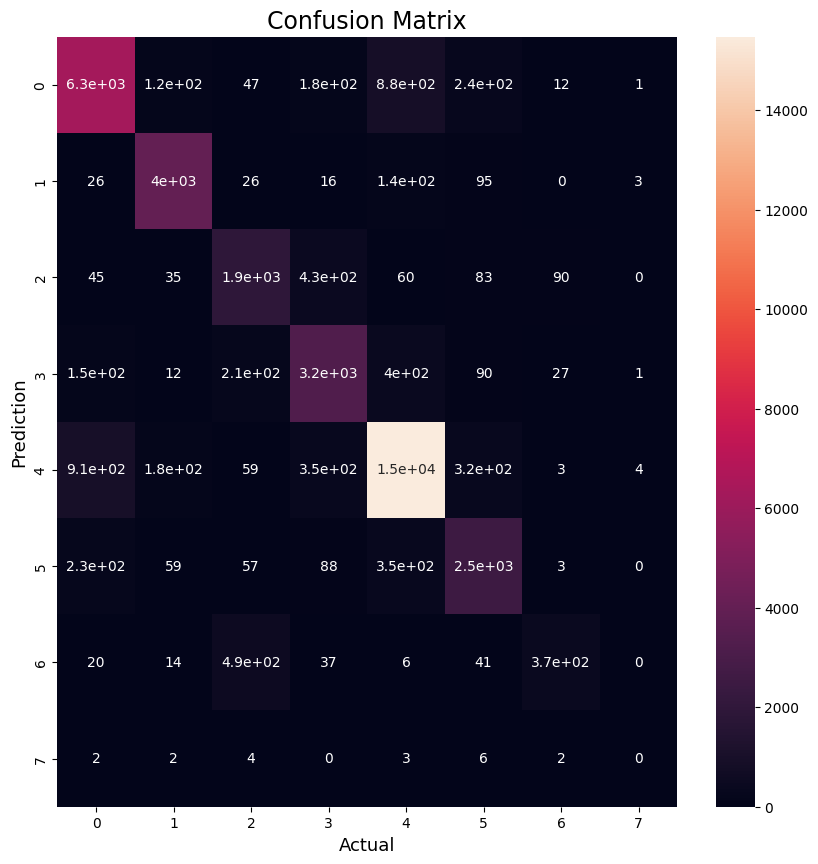

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix,
            annot=True,)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

In [83]:
# 0 : Debt collection
# 1 : Mortgage
# 2 : account
# 3 : card
# 4 : credit_report
# 5 : loan
# 6 : money_transfer
# 7 : others

In [84]:
# 4 getting misclasiify by --> 0,1,3,5
# 5 getting misclasiify by --> 0,4
# 3 getting misclasiify by --> 0,2, 4
# 2 getting misclasiify by --> 3

In [85]:
# Debt collection	Mortgage	account	card	credit_report	loan	money_transfer	others

In [86]:
#Error Analysis
# type 1 : FP

# type 2: FN

# accuracy

# precision  : minimun type 1 error  --> Spam classifiaction

# recall : minimun type 1 error --> diesese prediction

In [87]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      7815
           1       0.90      0.93      0.92      4293
           2       0.68      0.72      0.70      2645
           3       0.75      0.78      0.77      4120
           4       0.89      0.89      0.89     17296
           5       0.74      0.76      0.75      3303
           6       0.73      0.38      0.50       977
           7       0.00      0.00      0.00        19

    accuracy                           0.84     40468
   macro avg       0.69      0.66      0.67     40468
weighted avg       0.84      0.84      0.83     40468



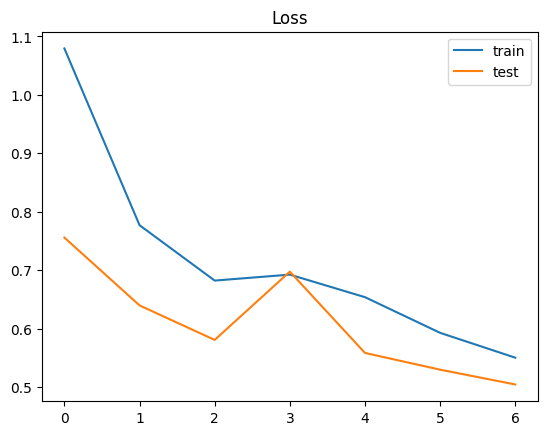

In [88]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

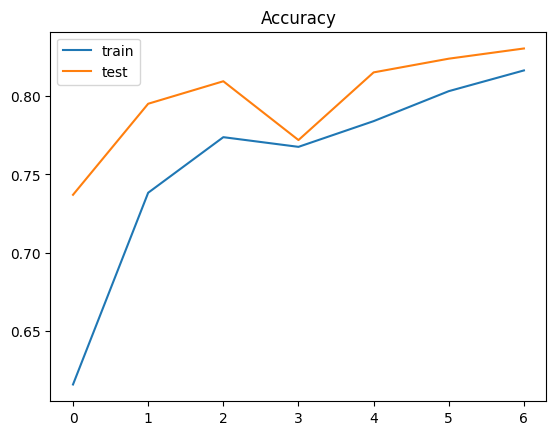

In [89]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [90]:
df['Product'].value_counts()

Product
credit_report      348053
Debt collection    157381
Mortgage            84461
card                81042
loan                65744
account             52274
money_transfer      20096
others                292
Name: count, dtype: int64

In [91]:
df.head()

,Product,Consumer complaint narrative
1,loan,i contacted ally on friday after falling behi...
7,credit_report,hello this complaint is against the three cred...
8,credit_report,i am a victim of identity theft currently hav...
10,credit_report,two accounts are still on my credit history af...
13,credit_report,receiving daily telephone call s from ide...


In [92]:
df['Consumer complaint narrative'][10]

'two accounts are still on my credit history after contacting the credit bureau they have the incorrect status and account balances \n\n        '

In [93]:
new_complaint = ['''i contacted ally on friday after falling behind on payments due to being out of work for a short period of time due to an illness i chated with a representative after logging into my account regarding my opitions to ensure i protect my credit and bring my account current

she advised me that before an extenstion could be done i had to make a payment in the amount of i reviewed my finances as i am playing catch up on all my bills and made this payment on monday this rep advised me once this payment posts to my account to contact ally back for an extention or to have a payment deffered to the end of my loan

with this in mind i contacted ally again today and chatted with i explained all of the above and the information i was provided when i chatted with the rep last week she asked several questions and advised me that a one or two month extension deffered payment could be done however partial payment is needed what she advised me or there abouts would be due within days from me accepting the agreement and then the remaining bal of or there abouts would be due in in my payments of per month would resume

if this was the case i should have just been offered this when i just made my payment so that i could catch up on my bills

this company was working with in new jersey which has since closed most likely due to illegal practices they changed my loan company to this company after i had signed paperwork for another kill you with interest rates and has never once considered refiancing my vechile for a lower interest rate due to the age of the vechile other companies will not take it and they do not work with you ''']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=1000)
pred = model.predict(padded)
labels = ['credit_report','debt_collection','mortgage','card','savings_account', 'loan', 'money_transfer', 'vehicle_loan', 'others']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
[[0.0185319  0.09864334 0.01431783 0.02943346 0.01243903 0.817527
  0.00826698 0.00084043]] loan


In [94]:
# Y = pd.get_dummies(df['Product'])

In [95]:
df.head()

,Product,Consumer complaint narrative
1,loan,i contacted ally on friday after falling behi...
7,credit_report,hello this complaint is against the three cred...
8,credit_report,i am a victim of identity theft currently hav...
10,credit_report,two accounts are still on my credit history af...
13,credit_report,receiving daily telephone call s from ide...


In [96]:
new_dict = {'others':'credit_report'}
df.replace({'Product' : new_dict}, inplace=True)

/tmp/ipykernel_34/2761954330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Product' : new_dict}, inplace=True)


In [97]:
df['Product'].value_counts()

Product
credit_report      348345
Debt collection    157381
Mortgage            84461
card                81042
loan                65744
account             52274
money_transfer      20096
Name: count, dtype: int64

In [98]:
df.shape

(809343, 2)

In [99]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer complaint narrative'],
                                                    df['Product'],
                                                    test_size=0.05,
                                                    random_state=42)

In [101]:
X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

In [2]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
# Train the Word2Vec model
sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [107]:
vocab_size = 30000

In [ ]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad the sequences to a fixed length
max_length = 1000
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
#Define Model
model = Sequential()
model.add(Embedding(30000, 100, weights=[embedding_matrix], input_length=max_length, trainable=False))

model.add(SpatialDropout1D(0.2))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])